# n階微分方程式を解く

n階微分方程式を解くには，n個連立の1階微分方程式を解けば良い．

$$
\frac{d^nx}{dx^n} = f(x, t)
$$

として，右辺の$f(x,t)$と階数$n$を入力とする．

In [294]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

In [360]:
# 自作のスキームたち(scipyのビルドイン関数使ったほうがいいけど勉強のため実装)
# 前進オイラー法
def forward_euler(diff_eq, init_con, t):
    dt = (max(t)-min(t))/len(t)
    x = init_con
    x_hist = np.array([x])
    x_hist = x_hist.reshape(len(x), 1)

    for i, nt in enumerate(t):
        if i == 0 : continue
        x = x + diff_eq(x, nt) * dt
        x_hist = np.c_[x_hist, x]
    return x_hist.T

# ホイン法(2次のルンゲ・クッタ法)
def heun(diff_eq, init_con, t):
    dt = (max(t)-min(t))/len(t)
    x = init_con
    x_hist = np.array([x])
    x_hist = x_hist.reshape(len(x), 1)

    for i, nt in enumerate(t):
        if i == 0 : continue
        k1 = dt * diff_eq(x, nt)
        k2 = dt * diff_eq(x+k1, nt+dt)
        x = x + (k1+k2)/2
        x_hist = np.c_[x_hist, x]
    return x_hist.T

# 4次のルンゲ・クッタ法
def rk4(diff_eq, init_con, t):
    dt = (max(t)-min(t))/len(t)
    x = init_con
    x_hist = np.array([x])
    x_hist = x_hist.reshape(len(x), 1)

    for i, nt in enumerate(t):
        if i == 0 : continue
        k1 = dt * diff_eq(x, nt)
        k2 = dt * diff_eq(x+k1/2, nt+dt/2)
        k3 = dt * diff_eq(x+k2/2, nt+dt/2)
        k4 = dt * diff_eq(x+k3  , nt+dt)
        x = x + (k1 + 2*k2 + 2*k3 + k4) / 6
        x_hist = np.c_[x_hist, x]
    return x_hist.T

In [361]:
# 常微分方程式のクラス
class ODE(object):
    def __init__(self, diff_eq, init_con):
        self.diff_eq  = diff_eq     # 解くべき方程式(関数)
        self.init_con = init_con    # 初期条件(配列)

    def solve(self, t_min, t_max, N, solver=odeint):    # solverはデフォルトではscipyの関数だが，自作関数に変えることもできる
        t = np.linspace(t_min, t_max, N)                # 時刻tの配列の生成
        x = solver(self.diff_eq, self.init_con, t)      # 方程式の解を計算する
        return t, x

In [362]:
# 3Dplot用の関数
def plot3D(x, y, z):
    fig = plt.figure(figsize=(10,4))
    sol = fig.add_subplot(1,1,1, projection='3d')
    sol.set_xlabel("$x$", fontsize=20, fontname='serif')
    sol.set_ylabel("$y$", fontsize=20, fontname='serif')
    sol.set_zlabel("$z$", fontsize=20, fontname='serif')
    sol.tick_params(axis='both', length=10, which='major')
    sol.tick_params(axis='both', length=5,  which='minor')
    sol.minorticks_on()
    sol.plot(x, y, z, 'b')
    sol.view_init(30, 45)
    plt.show()

# plot用の関数
def plot(x, y, x_range, y_range, ylabel):
    fig = plt.figure(figsize=(10,4))
    sol = fig.add_subplot(1,1,1)
    sol.set_xlabel("$t$", fontsize=20, fontname='serif')
    sol.set_ylabel(ylabel, fontsize=20, fontname='serif')
    sol.tick_params(axis='both', length=10, which='major')
    sol.tick_params(axis='both', length=5,  which='minor')
    sol.set_xlim(x_range)
    sol.set_ylim(y_range)
    sol.minorticks_on()
    sol.plot(x, y, 'r')
    plt.show()

In [363]:
# 解くべき方程式
# 第1引数がスカラでなくて配列になる

# 2階の場合を３階に拡張したらこのような実装
def diff_eq1(v, t):
    dxdt = v[1] # dxdt = v
    dvdt = v[2] # dvdt = a
    dadt = 5*np.cos(t) # dadt = d^3x/dt^3 = f(x,t)
    return np.array([dxdt, dvdt, dadt])

# n階でも使える実装は以下の通り．
def diff_eq2(v, t): 
    dvdt = v[1:] # n-1個の連立微分方程式を生成(d^{1~(n-1)}x/dt^{1~(n-1)})
    f = 4*np.sin(t)
    dvdt = np.append(dvdt, f) # n番目の微分方程式を生成(d^nx/dt^n=f)
    return dvdt


# 例1
以下の3階微分方程式を解く．
$$ \frac{d^3x}{dt^3} = 5\cos(t) $$
初期条件は，
$$x(0)=0, \dot x(0)=0, \ddot x(0)=0$$
このとき，解は次のようになる．
$$
\ddot x = 5\sin(t) \\
\dot x = -5\cos(t) + 5 \\
x = -5\sin(t) + 5t
$$

（注意）刻み幅が結構大きいと自作のforward_euler, heun, rk4では精度がひどいことになる．一方でscipyのビルドイン関数による計算では精度が全く落ちないのですごい．

(100000, 3)


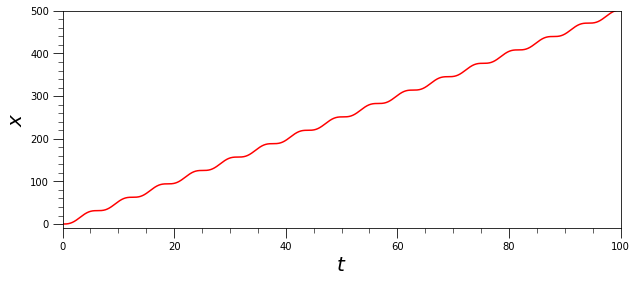

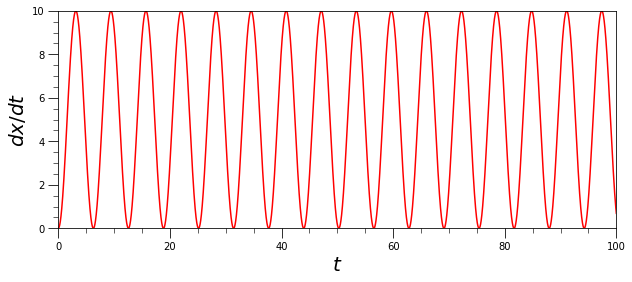

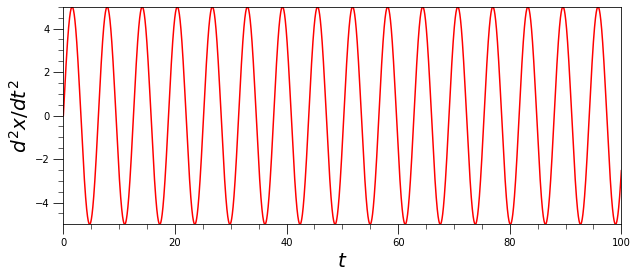

In [365]:
N = 100000                       # 分割数
min_t = 0                          # t の最小
max_t = 100                      # t の最大

initial_condition = np.array([0, 0, 0])  # 初期条件
ode = ODE(diff_eq1, initial_condition)
t, v = ode.solve(min_t, max_t, N)
print(v.shape)
plot(t, v[:,0], (min_t, max_t), (-10, 500), '$x$' ) # x
plot(t, v[:,1], (min_t, max_t), (0,10), '$dx/dt$' ) # dx/dt 
plot(t, v[:,2], (min_t, max_t), (-5, 5), '$d^2x/dt^2$') # dx^2/dt^2

# 例2
以下の4階微分方程式を解く．
$$ \frac{d^4x}{dt^4} = 4\sin(t) $$
初期条件は，
$$x(0)=0, \dot x(0)=0, \ddot x(0)=0, \dddot x(0)=0$$
このとき，解は次のようになる．
$$
\dddot x = -4\cos(t) + 4 \\
\ddot x = -4\sin(t) + 4t \\
\dot x = 4\cos(t) + 2t^2 - 4 \\
x = 4\sin(t)  + \frac{2}{3}t^3 - 4t
$$


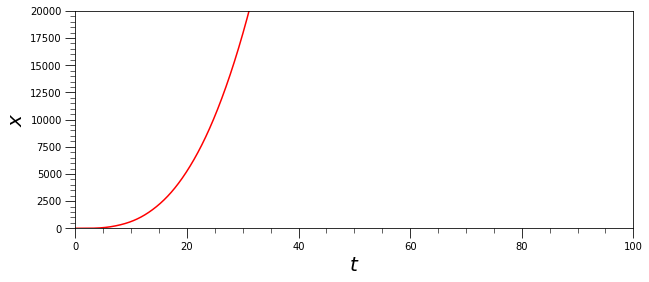

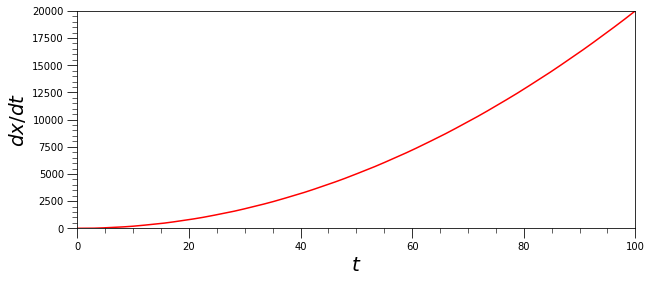

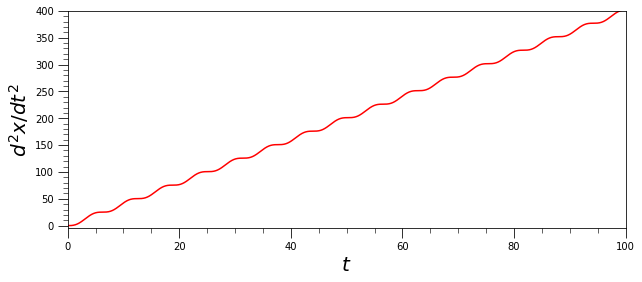

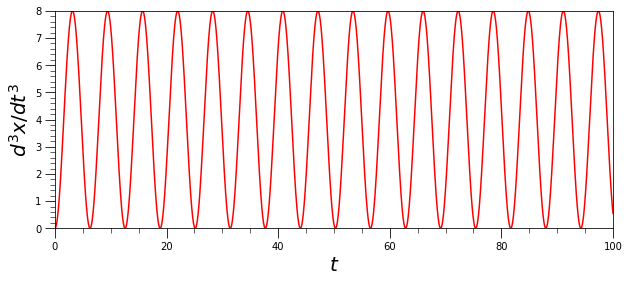

In [368]:
initial_condition = np.array([0, 0, 0, 0])  # 初期条件
ode = ODE(diff_eq2, initial_condition)
t, v = ode.solve(min_t, max_t, N)
plot(t, v[:,0], (min_t, max_t), (0, 20000), '$x$' ) # x
plot(t, v[:,1], (min_t, max_t), (0,20000), '$dx/dt$' ) # dx/dt 
plot(t, v[:,2], (min_t, max_t), (-5, 400), '$d^2x/dt^2$') # dx^2/dt^2
plot(t, v[:,3], (min_t, max_t), (0, 8), '$d^3x/dt^3$') # dx^2/dt^2